In [109]:
#to import header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [84]:
data = pd.read_csv('sales_06_FY2020-21 copy.csv')
print(data)

         order_id      status  item_id                    sku  qty_ordered  \
0       100354678    received   574772     oasis_Oasis-064-36           21   
1       100354678    received   574774        Fantastic_FT-48           11   
2       100354680    complete   574777        mdeal_DMC-610-8            9   
3       100354680    complete   574779     oasis_Oasis-061-36            9   
4       100367357    received   595185    MEFNAR59C38B6CA08CD            2   
...           ...         ...      ...                    ...          ...   
286387  100562365        paid   905179    APPCHA5AF14939B8F8A            2   
286388  100562376         cod   905191    MEFCOT5A8D1E973B886            2   
286389  100562383         cod   905200  WOFVAL59D5EA84167F9-M            2   
286390  100562384         cod   905202  WOFNIG5B4D7EB0E9FDD-L            2   
286391  100562386  processing   905205    MATHUA5AF70A7D1E50A            2   

         price   value  discount_amount   total           categ

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   status            286392 non-null  object 
 2   item_id           286392 non-null  int64  
 3   sku               286392 non-null  object 
 4   qty_ordered       286392 non-null  int64  
 5   price             286392 non-null  float64
 6   value             286392 non-null  float64
 7   discount_amount   286392 non-null  float64
 8   total             286392 non-null  float64
 9   category          286392 non-null  object 
 10  payment_method    286392 non-null  object 
 11  bi_st             286392 non-null  object 
 12  cust_id           286392 non-null  int64  
 13  year              286392 non-null  int64  
 14  month             286392 non-null  object 
 15  ref_num           286392 non-null  int64  
 16  Name Prefix       28

In [86]:
data.head(50)

,order_id,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.00000,1798.00000,Men's Fashion,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
1,100354678,received,574774,Fantastic_FT-48,11,19.0,190.0,0.00000,190.00000,Men's Fashion,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
2,100354680,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.00000,1199.20000,Men's Fashion,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
3,100354680,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.00000,639.20000,Men's Fashion,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
4,100367357,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.00000,99.90000,Men's Fashion,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
5,100367357,received,595186,MEFBUY59B7C3DDC2CA3-42,2,39.9,39.9,0.00000,39.90000,Men's Fashion,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
6,100367360,order_refunded,595192,MATDAN59C3C845B38F0,2,47.6,47.6,0.00000,47.60000,Mobiles & Tablets,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.000000
7,100354677,canceled,574769,GFE_19_USBLEDLight,2,49.0,49.0,0.00000,49.00000,Mobiles & Tablets,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000
8,100354677,canceled,574770,oasis_Kingston-32GB-DTIG4,2,135.0,135.0,0.00000,135.00000,Computing,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000
9,100354677,canceled,574771,Geepas_GSB5420,2,549.9,549.9,0.00000,549.90000,Appliances,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.000000


In [87]:
#before cleaning of the dataset from duplicate values the shape of the dataset is as follows
data.shape

(286392, 35)

In [88]:
print("Initial number of rows present in the dataset is ",data.shape[0])
print("Initial number of rows present in the dataset is ",data.shape[1])

Initial number of rows present in the dataset is  286392
Initial number of rows present in the dataset is  35


In [89]:
#presence of null values in the dataset 
data.isnull()

,order_id,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
286388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
286389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
286390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
data.isnull().sum()
#this shows the dataset doesn't have null values in it

order_id            0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [91]:
#in order to check for duplicate values the following operation is done
data_drop = data.duplicated().any()
print(data_drop)

False


In [92]:
#the dataset has duplicate values in it hence these values have to be eliminated
data = data.drop_duplicates()
data.shape

(286392, 35)

In [93]:
print("Final Number of rows in the dataset is ",data.shape[0])
print("Final Number of columns in the dataset is ",data.shape[1])

#it can be seen that the number of rows and columns before and after data cleaning is different

Final Number of rows in the dataset is  286392
Final Number of columns in the dataset is  35


In [94]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,286392.0,741664.902131,95746.031827,574769.0,659684.50,742309.00,826124.25000,905208.00
qty_ordered,286392.0,3.011296,4.573837,1.0,2.00,2.00,3.00000,501.00
price,286392.0,851.385253,1741.750751,0.0,49.90,119.00,950.00000,101262.59
value,286392.0,885.879934,2073.252179,0.0,49.90,158.97,910.00000,101262.59
discount_amount,286392.0,70.039427,256.880870,0.0,0.00,0.00,18.38305,30213.15
total,286392.0,815.840507,1983.580302,0.0,49.90,149.80,800.00000,101262.59
cust_id,286392.0,70048.019054,30243.856395,4.0,56519.00,74225.50,92357.00000,115326.00
year,286392.0,2020.618778,0.485688,2020.0,2020.00,2021.00,2021.00000,2021.00
ref_num,286392.0,560853.663395,255828.418398,111127.0,341265.00,564857.00,781086.00000,999981.00
age,286392.0,46.489033,16.673288,18.0,32.00,47.00,61.00000,75.00


In [95]:
data['Gender'].value_counts()

M    146184
F    140208
Name: Gender, dtype: int64

([<matplotlib.axis.XTick at 0x1e01276e8b0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

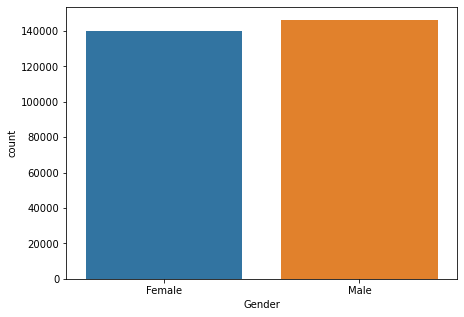

In [96]:
plt.figure(figsize=(7,5),facecolor='white')
sn.countplot(data['Gender'])
plt.xticks([0,1],['Female','Male'])

In [97]:
data.corr()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
item_id,1.000000,0.103074,0.072898,0.078383,-0.073722,0.091474,0.413622,0.843113,0.008687,-0.006897,-0.007635,-0.133427
qty_ordered,0.103074,1.000000,-0.103748,0.005123,0.021244,0.002603,-0.012639,0.119646,0.011227,0.000552,0.005192,0.073697
price,0.072898,-0.103748,1.000000,0.767113,0.241494,0.770518,0.107743,0.019229,-0.001493,-0.007935,-0.000976,0.053462
value,0.078383,0.005123,0.767113,1.000000,0.403482,0.992955,0.115429,0.039287,-0.006652,-0.002973,-0.003190,0.077948
discount_amount,-0.073722,0.021244,0.241494,0.403482,1.000000,0.292218,-0.020460,-0.092108,-0.005109,0.000782,0.002785,0.426131
total,0.091474,0.002603,0.770518,0.992955,0.292218,1.000000,0.123297,0.052991,-0.006291,-0.003209,-0.003695,0.026287
cust_id,0.413622,-0.012639,0.107743,0.115429,-0.020460,0.123297,1.000000,0.352969,-0.016442,-0.006795,-0.001935,-0.153045
year,0.843113,0.119646,0.019229,0.039287,-0.092108,0.052991,0.352969,1.000000,0.000865,0.000048,-0.000731,-0.181190
ref_num,0.008687,0.011227,-0.001493,-0.006652,-0.005109,-0.006291,-0.016442,0.000865,1.000000,-0.012898,-0.016433,-0.002294
age,-0.006897,0.000552,-0.007935,-0.002973,0.000782,-0.003209,-0.006795,0.000048,-0.012898,1.000000,0.001808,-0.001719


<AxesSubplot:>

<Figure size 1224x432 with 0 Axes>

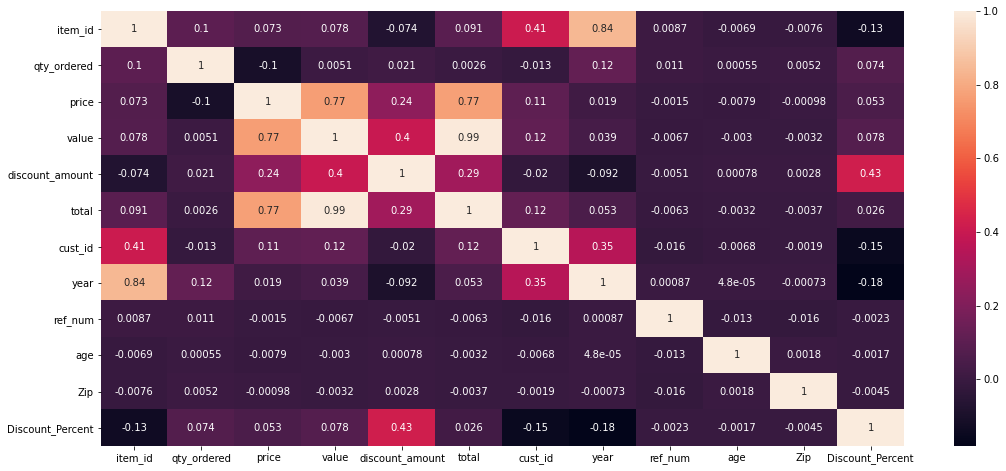

In [98]:
plt.figure(figsize=(17,6))
plt.figure(figsize=(18,8),facecolor='white')
sn.heatmap(data.corr(),annot=True)

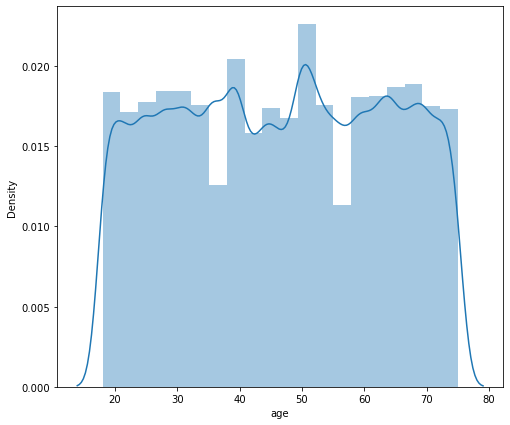

In [99]:
#check age distribution in dataset
plt.figure(figsize=(8,7),facecolor='white')
sn.distplot(data['age'],bins=20)
plt.show()

In [100]:
boughts = data.groupby('category').agg({'qty_ordered': 'sum'}).sort_values('qty_ordered',ascending=False)[:10]
boughts

,qty_ordered
category,
Mobiles & Tablets,135041
Others,109266
Men's Fashion,102374
Superstore,101964
Appliances,82435
Women's Fashion,78944
Beauty & Grooming,71122
Home & Living,41830
Entertainment,34788


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mobiles & Tablets'),
  Text(1, 0, 'Others'),
  Text(2, 0, "Men's Fashion"),
  Text(3, 0, 'Superstore'),
  Text(4, 0, 'Appliances'),
  Text(5, 0, "Women's Fashion"),
  Text(6, 0, 'Beauty & Grooming'),
  Text(7, 0, 'Home & Living'),
  Text(8, 0, 'Entertainment'),
  Text(9, 0, 'Health & Sports')])

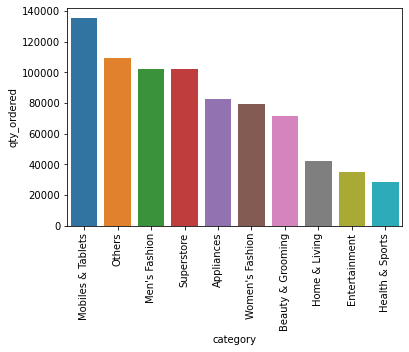

In [101]:
sn.barplot(x='category',y='qty_ordered',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

In [102]:
productSales = pd.DataFrame(data.groupby('category').sum()['qty_ordered'])
productSales.sort_values(by=['qty_ordered'], inplace=True, ascending=False)
productSales.head(10)

,qty_ordered
category,
Mobiles & Tablets,135041
Others,109266
Men's Fashion,102374
Superstore,101964
Appliances,82435
Women's Fashion,78944
Beauty & Grooming,71122
Home & Living,41830
Entertainment,34788


In [103]:
payment = pd.DataFrame(data.groupby('payment_method').count()['cust_id'])
payment.sort_values(by=['cust_id'], inplace=True, ascending=False)
payment.head(10)

,cust_id
payment_method,
cod,102916
Easypay,69679
Payaxis,31049
easypay_voucher,29763
bankalfalah,23057
Easypay_MA,11536
jazzwallet,6669
jazzvoucher,6045
customercredit,3702


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'cod'),
  Text(1, 0, 'Easypay'),
  Text(2, 0, 'Payaxis'),
  Text(3, 0, 'easypay_voucher'),
  Text(4, 0, 'bankalfalah'),
  Text(5, 0, 'Easypay_MA'),
  Text(6, 0, 'jazzwallet'),
  Text(7, 0, 'jazzvoucher'),
  Text(8, 0, 'customercredit'),
  Text(9, 0, 'apg'),
  Text(10, 0, 'mcblite'),
  Text(11, 0, 'cashatdoorstep'),
  Text(12, 0, 'financesettlement')])

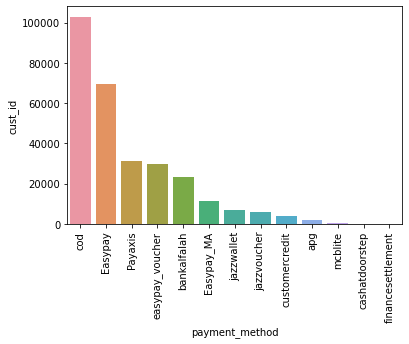

In [104]:
sn.barplot(x='payment_method',y='cust_id',data=payment.reset_index())
plt.xticks(rotation = 'vertical')

In [105]:
receive = pd.DataFrame(data.groupby('status').count()['category'])
receive.sort_values(by=['status'], inplace=True, ascending=False)
receive.head(10)

,category
status,
refund,3820
received,51775
processing,33
pending_paypal,4
pending,48
payment_review,57
paid,756
order_refunded,25713
holded,25


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'refund'),
  Text(1, 0, 'received'),
  Text(2, 0, 'processing'),
  Text(3, 0, 'pending_paypal'),
  Text(4, 0, 'pending'),
  Text(5, 0, 'payment_review'),
  Text(6, 0, 'paid'),
  Text(7, 0, 'order_refunded'),
  Text(8, 0, 'holded'),
  Text(9, 0, 'complete'),
  Text(10, 0, 'cod'),
  Text(11, 0, 'closed'),
  Text(12, 0, 'canceled')])

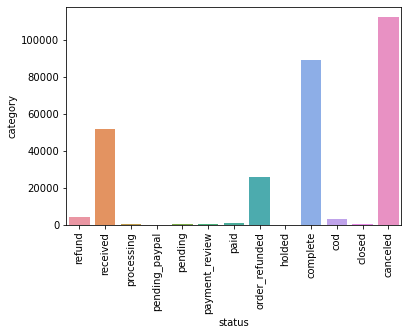

In [106]:
sn.barplot(x='status',y='category',data=receive.reset_index())
plt.xticks(rotation = 'vertical')